In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz
# Loading the data
raw_data = pd.read_csv('churn raw data.csv', encoding='latin-1')

# print the shape
print(raw_data.shape)

# Loading the data
raw_data = pd.read_csv('churn raw data.csv', encoding='latin-1')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()
#runs the first 5 rows
raw_data.head()

(10000, 14)
(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:

# Loading the data
raw_data = pd.read_csv('churn raw data.csv', encoding='latin-1')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])#gives us the unique element within the column  
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [4]:
# Checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

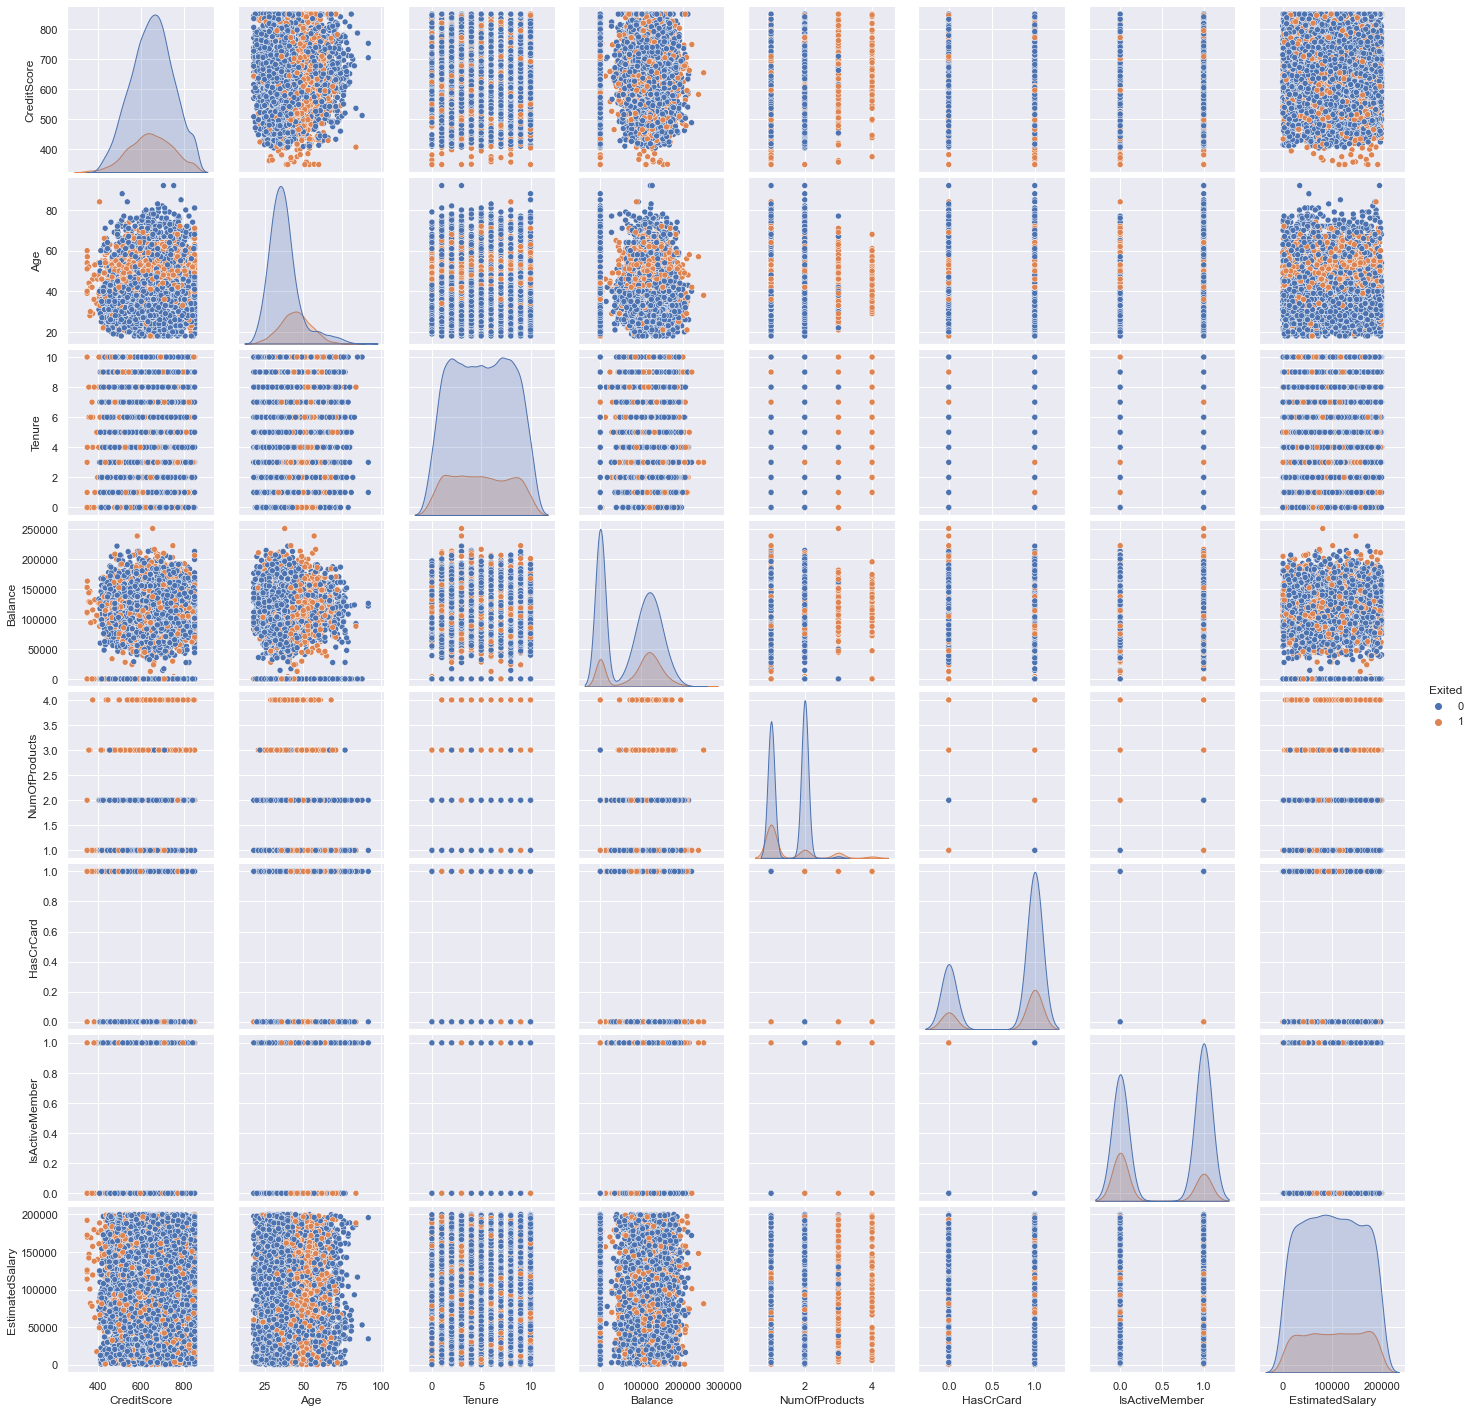

In [6]:
# limiting the raw data to only include the numeric columns
raw_data2 = raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw': 0.2})

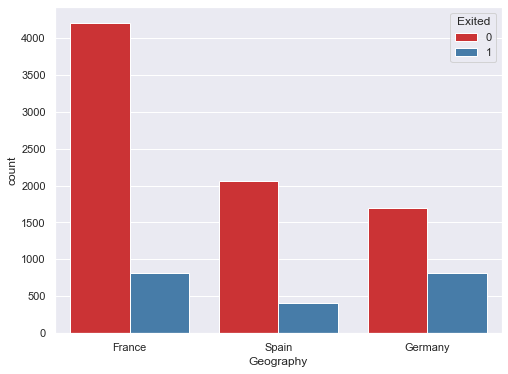

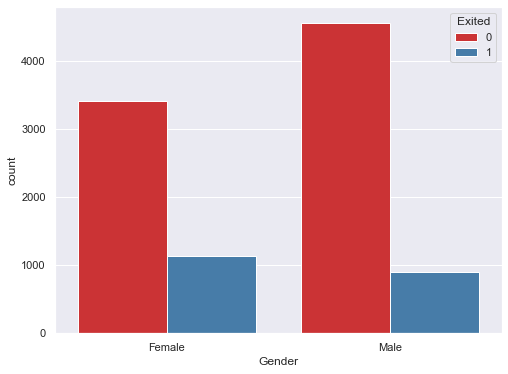

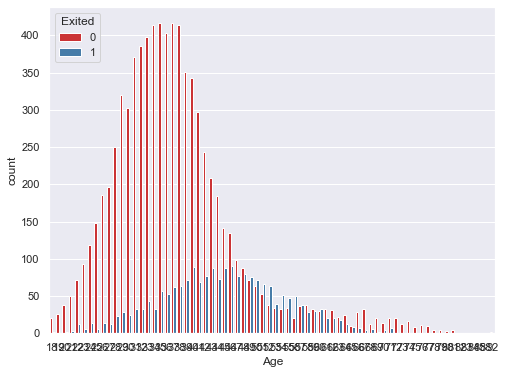

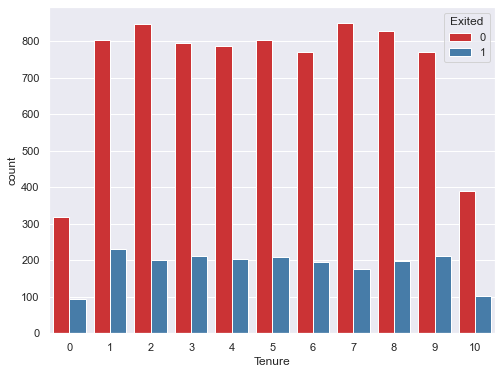

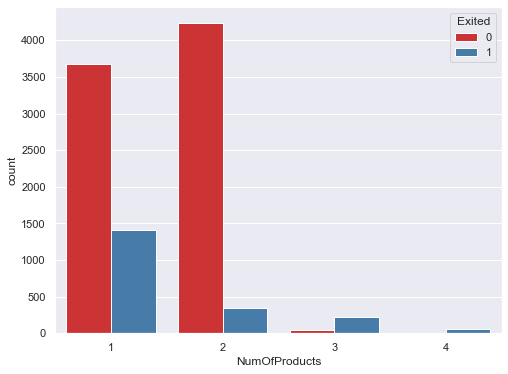

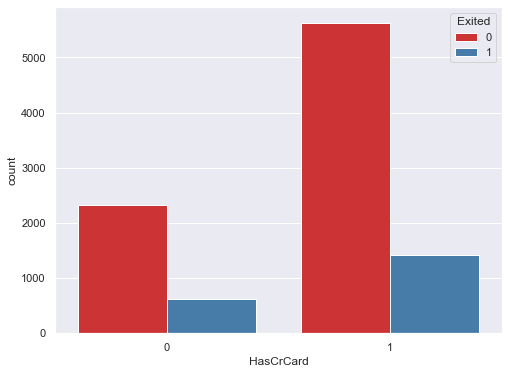

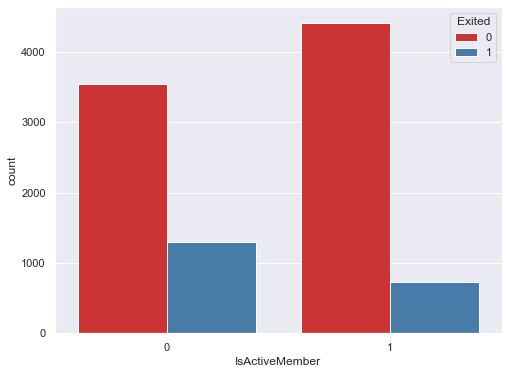

In [7]:
# Investigate all the features by our y

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue = 'Exited', palette="Set1")


In [8]:
raw_data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [10]:
# Scaling our columns

scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


## Spliting our data into X and Y - Hold out Validation 

In [11]:
# Your code goes here
X = new_raw_data.drop('Exited', axis=1).values# Input features (attributes)
y = new_raw_data['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


In [12]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

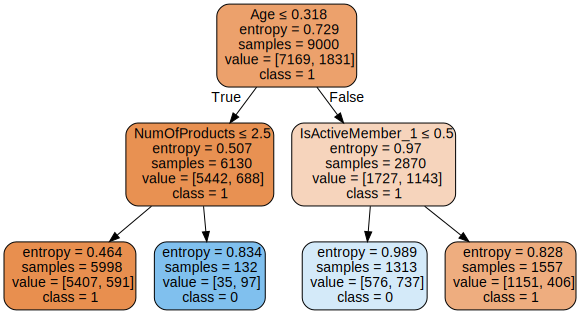

In [13]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('Exited', axis=1).columns,    
    class_names=new_raw_data['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [14]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi


Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.622
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.196
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.182


,index,Variable,Feature Importance Score
0,1,Age,0.622346
1,4,NumOfProducts,0.195552
2,14,IsActiveMember_1,0.182102
3,0,CreditScore,0.000000
4,2,Tenure,0.000000
5,3,Balance,0.000000
6,5,EstimatedSalary,0.000000
7,6,Geography_France,0.000000
8,7,Geography_Germany,0.000000
9,8,Geography_Spain,0.000000


In [15]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))


Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


In [16]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

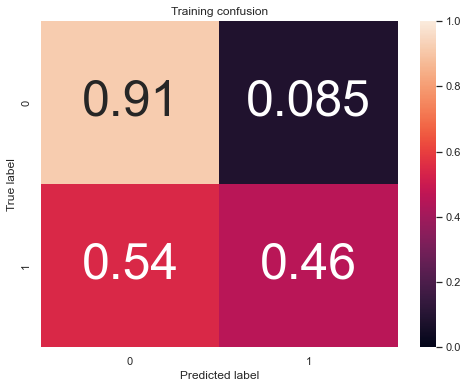

In [17]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [18]:
y_pred = dt.predict(X_train)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
confusion_matrix(y_train, y_pred)

array([[6558,  611],
       [ 997,  834]], dtype=int64)

In [20]:
pd.DataFrame(confusion_matrix(y_train, y_pred),columns=['Predicted No', 'Predicted Yes'], index=['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,6558,611
Actual Yes,997,834


In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7169
           1       0.58      0.46      0.51      1831

    accuracy                           0.82      9000
   macro avg       0.72      0.69      0.70      9000
weighted avg       0.81      0.82      0.81      9000



## Random Forest
Running Random Forest
Notes:

Random forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.

Takes the average (entropy/information gain) of many Decision Trees via bagging.

Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average

Training Accuracy is:  0.9997777777777778
Testing Accuracy is:  0.864


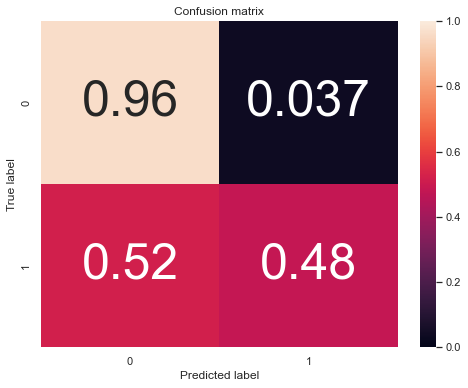

In [23]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.860
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.802
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.868
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.800
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.812
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.831
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.850
Classification accuracy on test set with max features = log2 and max_depth = None: 0.868
Classification accuracy on test set with max features = log2

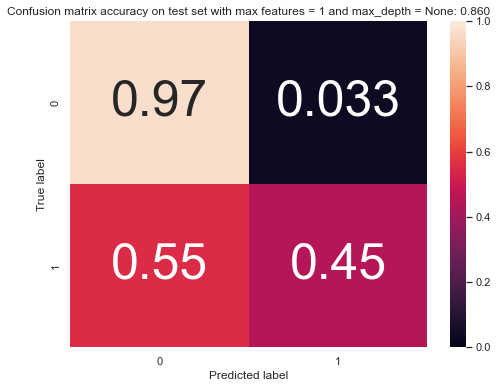

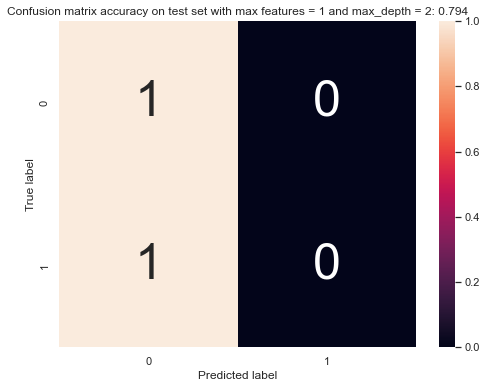

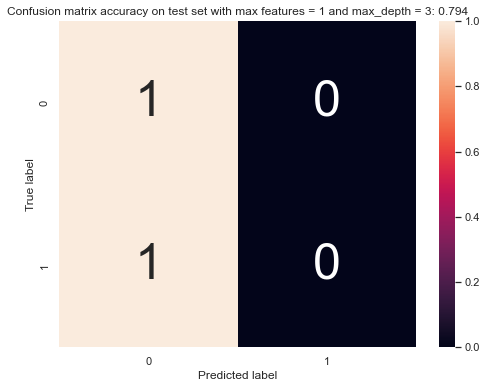

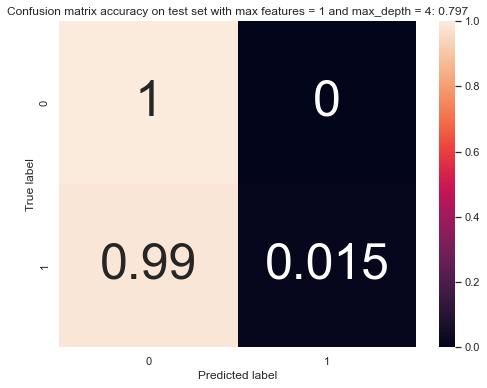

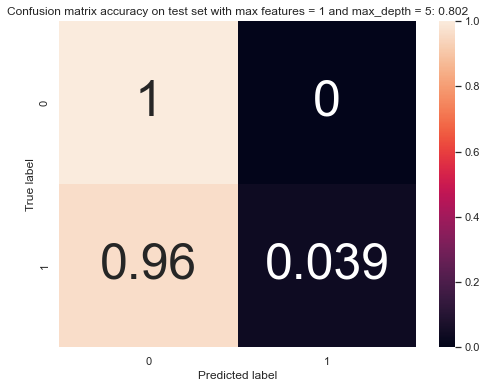

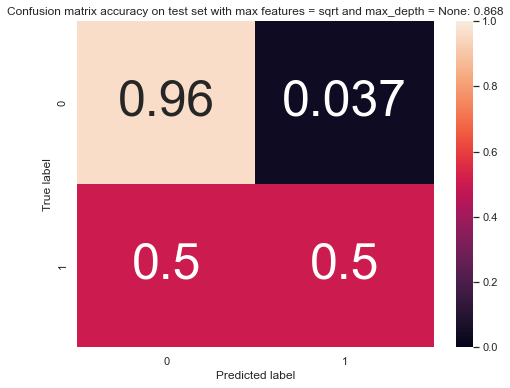

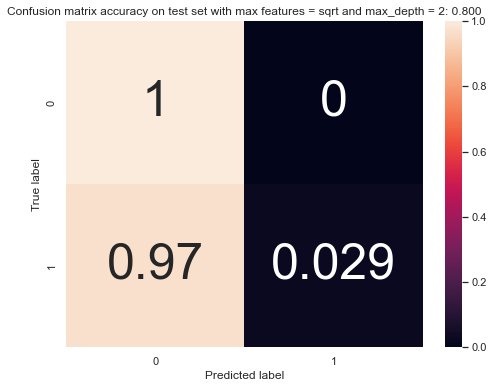

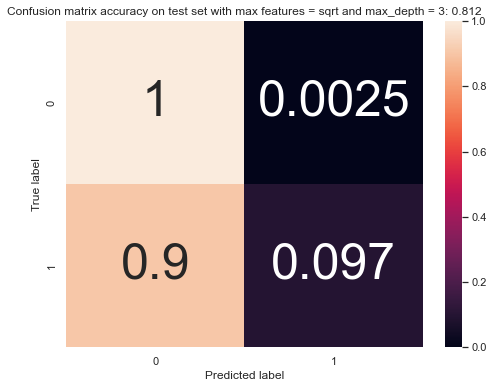

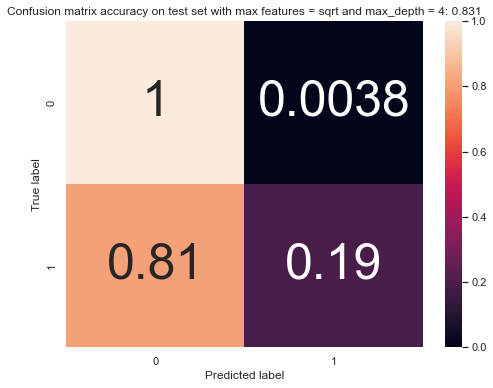

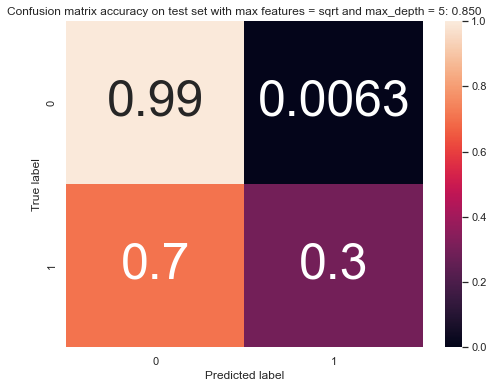

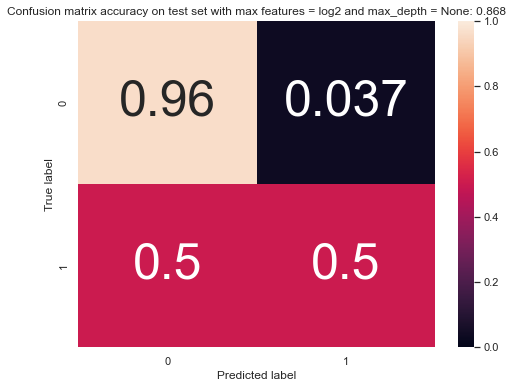

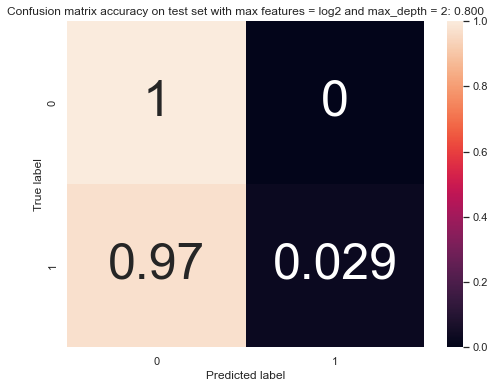

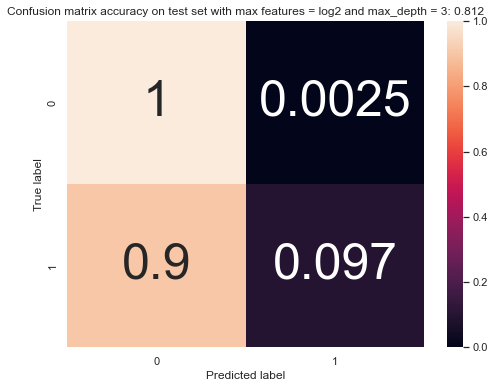

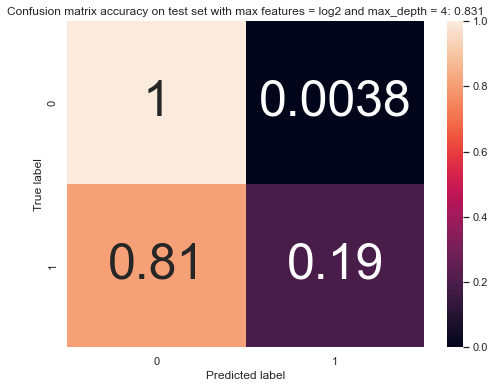

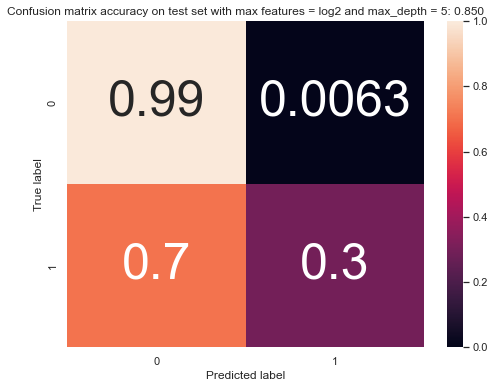

In [24]:
#Tuning our hyper parameters to see if we can improve our result
from itertools import product
n_estimators = 100 #no of trees in the forest
max_features = [1, 'sqrt', 'log2'] #no of features to consider
max_depth = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depth): #with product we can iterate over every possible combination
    rf = RandomForestClassifier(n_estimators = n_estimators, 
                                criterion = 'entropy', 
                                max_features = f, 
                                max_depth = d, 
                                n_jobs = 2, 
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test,prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))


Training Accuracy is:  1.0
Testing Accuracy is:  0.865


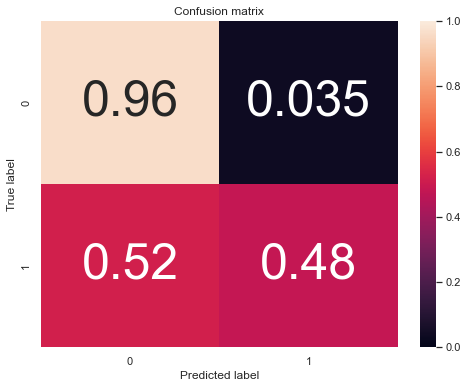

In [25]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', max_depth=None)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

## XGBoost
Notes:

XGBoost is short for “eXtreme Gradient Boosting.”
It is an ensemble model; ensemble models combines different machine learning models into one
Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models went wrong
XGBoost trains upon the residuals. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round

Doc 1: https://xgboost.readthedocs.io/en/latest/parameter.html

Doc 2: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

Doc 3: https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97

In [26]:
# Loading from CSV
unseen_data = pd.read_csv('new unseen data.csv', encoding='latin-1')

# print the shape
print(unseen_data.shape)

# Viz
unseen_data.head()

(3344, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# Investigate all the elements whithin each Feature 

for column in unseen_data:
    unique_vals = np.unique(raw_data[column]) #np.unique(raw_data[column]); gives us the unique elememt within each column
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(i, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [28]:
unseen_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
# 9.2. Applying the same pre-processing stages

# Limiting the data
unseen_data2 = unseen_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

# dummy variables
unseen_data2 = pd.get_dummies(unseen_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

#scaling
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
unseen_data2[scale_vars] = scaler.fit_transform(unseen_data2[scale_vars])


unseen_data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.507077,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,0,1,1,0,0,1,0,1


In [30]:
pred_rf = rf.predict(unseen_data2.values)
pred_prob_rf = rf.predict_proba(unseen_data2.values)

pred_rf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
pred_prob_rf

array([[0.540000, 0.460000],
       [0.840000, 0.160000],
       [0.060000, 0.940000],
       ...,
       [0.880000, 0.120000],
       [0.880000, 0.120000],
       [0.970000, 0.030000]])

In [32]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_rf, 1)

[0.46,
 0.16,
 0.94,
 0.04,
 0.08,
 0.49,
 0.05,
 0.89,
 0.11,
 0.05,
 0.0,
 0.0,
 0.01,
 0.04,
 0.03,
 0.07,
 0.97,
 0.02,
 0.48,
 0.01,
 0.03,
 0.01,
 0.67,
 0.16,
 0.08,
 0.0,
 0.11,
 0.07,
 0.16,
 0.03,
 0.83,
 0.15,
 0.18,
 0.06,
 0.0,
 0.68,
 0.03,
 0.01,
 0.06,
 0.12,
 0.13,
 0.96,
 0.2,
 0.89,
 0.37,
 0.01,
 0.81,
 0.62,
 0.26,
 0.09,
 0.34,
 0.08,
 0.02,
 0.78,
 0.88,
 0.15,
 0.25,
 0.04,
 0.88,
 0.15,
 0.21,
 0.06,
 0.02,
 0.04,
 0.01,
 0.06,
 0.37,
 0.12,
 0.05,
 0.04,
 0.98,
 0.14,
 0.11,
 0.01,
 0.0,
 0.07,
 0.03,
 0.05,
 0.03,
 0.17,
 0.06,
 0.72,
 0.05,
 0.02,
 0.11,
 0.03,
 0.64,
 0.0,
 0.98,
 0.02,
 0.95,
 0.13,
 0.09,
 0.0,
 0.12,
 0.04,
 0.03,
 0.02,
 0.01,
 0.03,
 0.19,
 0.05,
 0.01,
 0.04,
 0.4,
 0.58,
 0.06,
 0.17,
 0.0,
 0.62,
 0.03,
 0.07,
 0.17,
 0.03,
 0.64,
 0.01,
 0.07,
 0.07,
 0.77,
 0.03,
 0.02,
 0.09,
 0.02,
 0.24,
 0.13,
 0.4,
 0.37,
 0.97,
 0.08,
 0.01,
 0.01,
 0.37,
 0.01,
 0.0,
 0.04,
 0.19,
 0.07,
 0.03,
 0.74,
 0.65,
 0.82,
 0.0,
 0.1,
 0.97,
 0.54,

In [33]:
#joining raw data with the predictions
output = unseen_data.copy()
output['predictions - churn or not'] = pred_rf
output['predictions to churn'] = column(pred_prob_rf, 1)
output['predictions - Churn or Not Desc'] = 'Empty'
output['predictions - Churn or Not Desc'][output['predictions - churn or not'] == 0] = "Retention"
output['predictions - Churn or Not Desc'][output['predictions - churn or not'] == 1] = "Churn"
output.head(10)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predictions - churn or not,predictions to churn,predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.46,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.16,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.94,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.04,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.08,Retention
5,6,15574048,AP Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0.49,Retention
6,7,15592567,AP Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,0.05,Retention
7,8,15656184,AP Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,0.89,Churn
8,9,15792401,AP He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0.11,Retention
9,10,15592425,AP H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,0.05,Retention


In [34]:
# 9.5. Exporting the data in a CSV
output.to_csv('Churn Predictions Output', sep='\t')

os. getcwd() 

'C:\\Users\\user'